# Verkeersimulatie Kruispunt
## snelheid uit plaats en tijd
De snelheid van een auto kan bepaald worden aan de hand van de afgeleide van de x,t grafiek van de auto. In dit geval is er geen formule die bepaald hoe snel de auto op een bepaald moment gaat, maar een set van data, waarbij aan de hand van elke 10e seconde wordt bepaald op welke locatie de auto zich bevindt. een afgeleide kan hierbij genomen worden door het verschil in plaats te delen door het verschil in tijd voor elk moment. Dit wordt gedaan door <i>np.diff()</i> De lengte van deze array is 1 kleiner dan de lengte van de oorspronkelijke array. Daarom moet voor x ook een schaal worden berekend om de lijn van de afgeleide goed weer te geven. Dit wordt gedaan door 2 keer de x-array te nemen en het eerste en laatste element weg te laten, en deze vervolgens bij elkaar op te tellen en door 2 te delen voor een benadering van de afgeleide. Dit wordt gedaan door middel van <i>(np.array(x)[:-1] + np.array(x)[1:]) / 2</i><br><br>
vervolgens worden de plots van beide auto's die aanwezig zijn in de csv geplot met matplotlib. Hierbij is een patroon zichtbaar: De snelheid van de auto neemt afwisselend toe en weer af. Om dit beter weer te geven wordt ook ingezoomd op het eerste gedeelte van het plot.

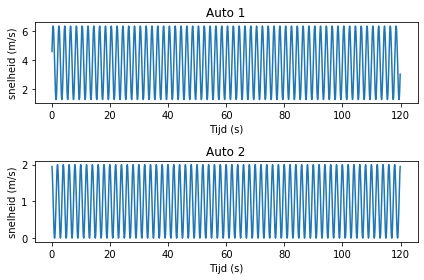

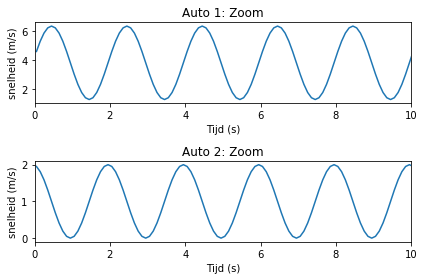

maximum snelheid (auto 1): 6.35
minimum snelheid (auto 1): 1.27
maximum snelheid (auto 2): 2.0
minimum snelheid (auto 2): 0.0


In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

x = []
auto1 = []
auto2 = []
with open("posities.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
        x.append(float(row[0]))
        auto1.append(float(row[1]))
        auto2.append(float(row[2]))

der_y1 = np.diff(auto1) / np.diff(x)
der_y2 = np.diff(auto2) / np.diff(x)
der_x = (np.array(x)[:-1] + np.array(x)[1:]) / 2

plt.subplot(2, 1, 1)
plt.plot(der_x, der_y1)
plt.title("Auto 1")
plt.xlabel("Tijd (s)")
plt.ylabel("snelheid (m/s)")

plt.subplot(2, 1, 2)
plt.plot(der_x, der_y2)
plt.title("Auto 2")
plt.xlabel("Tijd (s)")
plt.ylabel("snelheid (m/s)")
plt.tight_layout()
plt.show()

plt.subplot(2, 1, 1)
plt.plot(der_x, der_y1)
plt.title("Auto 1: Zoom")
plt.xlim(0, 10)
plt.xlabel("Tijd (s)")
plt.ylabel("snelheid (m/s)")

plt.subplot(2, 1, 2)
plt.plot(der_x, der_y2)
plt.xlim(0, 10)
plt.title("Auto 2: Zoom")
plt.xlabel("Tijd (s)")
plt.ylabel("snelheid (m/s)")
plt.tight_layout()
plt.show()

print("maximum snelheid (auto 1):", round(max(der_y1), 2))
print("minimum snelheid (auto 1):", round(min(der_y1), 2))
print("maximum snelheid (auto 2):", round(max(der_y2), 2))
print("minimum snelheid (auto 2):", round(min(der_y2), 2))

## plaats uit snelheid en tijd
De plaats van een voertuig kan worden bepaald uit de v,t grafiek van dat voertuig. De plaats 'x' kan worden berekend door de integraal te nemen vanaf tijd = 0 tot aan het huidige tijdspunt.

In [2]:
import csv
x = []
auto1 = []
auto2 = []
auto3 = []
autos_start = []
with open("snelheden.csv") as f:
    reader = csv.reader(f, delimiter=";")
    count = 0
    for row in reader:
        if count == 0:
            autos_start = [float(row[1]), float(row[2]), float(row[3])]
            count = 1
        else:
            x.append(float(row[0]))
            auto1.append(float(row[1]))
            auto2.append(float(row[2]))
            auto3.append(float(row[3]))

na importeren van de data uit het csv bestand en de eerste row apart genomen te hebben (eerste rij bevat de beginposities van de voertuigen) kan de integraal tussen 0 en 1, 0 en 2, 0 en 3 enz. worden berekend waardoor er een lijst met waarden ontstaat die de voortgang van het voertuig weergeeft. De integraal wordt berekend met np.trapz(), voor de juiste waarde een for-loop waarbij door de auto-lijsten wordt gelopen en voor elk element np.trapz(auto[0:i+2], x[0:i+2])

In [4]:
import numpy as np
a1 = [np.trapz(auto1[0:i+2], x[0:i+2]) for i in range(len(x) - 1)]
a2 = [np.trapz(auto2[0:i+2], x[0:i+2]) for i in range(len(x) - 1)]
a3 = [np.trapz(auto3[0:i+2], x[0:i+2]) for i in range(len(x) - 1)]

Na het maken van de positie-lijsten voor auto's moet een aanpassing worden gedaan aan de posities, alle posities moeten gecorrigeerd worden afhankelijk van de beginpositie (hierbij ook beredeneerd vanuit het midden van de auto, dus bij de ene grafiek 1 meter erbij, bij de ander 1 meter eraf, om te zien of er botsingen zijn tussen auto2 en auto3):

In [5]:
a2_1 = [i + autos_start[1] + 1 for i in a2]
a3_1 = [i + autos_start[2] - 1 for i in a3]

Vervolgens kunnen de grafieken worden geplot van de auto's:

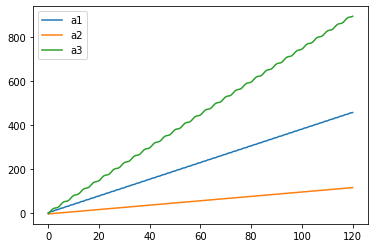

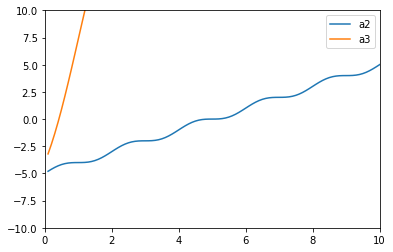

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x[1:], a1)
plt.plot(x[1:], a2_1)
plt.plot(x[1:], a3_1)
plt.legend(["a1", "a2", "a3"])
plt.show()

plt.plot(x[1:], a2_1)
plt.plot(x[1:], a3_1)
plt.legend(["a2", "a3"])
plt.xlim(0, 10)
plt.ylim(-10, 10)
plt.show()

De tweede grafiek is een zoom van de grafieken van auto's 2 en 3. Hierbij is te zien dat de grafieken ook in het begin geen snijpunten hebben en de auto's dus niet botsen. Dit kan gecontroleerd worden door de snijpunten te berekenen:

In [12]:
snijpunten = np.argwhere(np.diff(np.sign(np.array(a3_1) - np.array(a2_1)))).flatten()
print("Botsingen:", snijpunten)
print("Eerste 10 a1 posities:", a1[:10])

Botsingen: []
Eerste 10 a1 posities: [0.42024515830000003, 0.91513904365, 1.4735329289999999, 2.0780622648500002, 2.7068464424000003, 3.3356306199500003, 3.9401599558000004, 4.498553841150001, 4.9934477265, 5.4136928848000005]


Ook via de berekening zijn er geen snijpunten te vinden.<br>
Voor het botsen van auto 1 met auto's 2 en 3 moet worden gekeken naar het nulpunt, aangezien auto 1 op een andere weg rijdt, met een kruispunt in 0,0. In dit geval kan auto 1 niet botsen met auto's  2 en 3, omdat auto 1 start op 0,0 en vanuit daar alleen maar de positieve richting opgaat, zoals te zien is bij het printen van de eerste 10 posities van auto 1. Auto 1 zal dus niet kunnen botsen met de andere auto's omdat hij na het starten het kruispunt niet meer passeert.